###### 1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

The probability of having 15 or more hurricanes in a single year is  0.002217122790073356


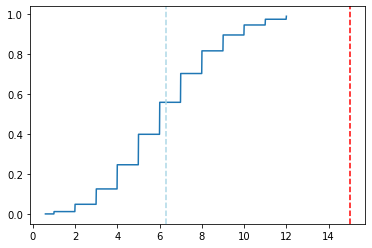

In [32]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

def Poisson(lamb,k):
    return ((lamb**k)*np.exp(-lamb))/(np.math.factorial(k))

x0 = 15. #observed data
mu = 6.3 #historical average
sigma = mu #considering a Poisson distribution

Z = (x0-mu)/sigma
w = mu - x0
x = np.linspace(mu - w - 3, w + mu + 3, 1000)
y = stats.poisson.cdf(x,mu)
plt.plot(x,y)

#plt.fill_between(x, y, where=np.abs(x - mu) > w, color='lightblue')
plt.axvline(x0, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')

#Calculating the probability of 15 or more hurricanes in a year

partial = [Poisson(mu,i) for i in range(0,15)]
p = 1 - sum(partial)
print("The probability of having 15 or more hurricanes in a single year is ",p)

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [35]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

#importing the dataset
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = 10
mu = np.mean(pre)
sample_mean = np.mean(post)
w = sample_mean - mu

#test stathistics
sigma_post = np.sqrt(np.var(post, ddof=1))
sigma_pre = np.sqrt(np.var(pre,ddof=1))
sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)

#results
T = w/(sigma*np.sqrt(2/n)) #formula given by the exercise
print("T = ", T)
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value = ", pvalue)

alpha = 0.05 #standard value given
if pvalue < alpha/2:
    print("The change was stathistically significant.")
elif pvalue >= alpha/2:
    print("The change was not stathistically significant.")

T =  3.786997938137629
p-value =  1.9956975358671354
The change was not stathistically significant.


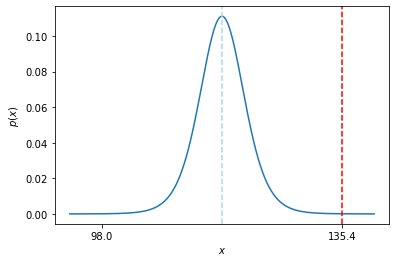

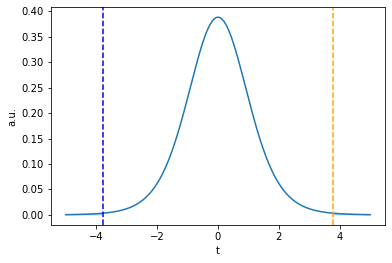

In [36]:
#plotting pdf of measurements and the results obtained

x = np.linspace(mu - w - 5, w + mu + 5, 1000)
y = stats.t.pdf(x, loc=mu, scale = sigma / np.sqrt(n), df = n - 1)
plt.plot(x, y)
plt.axvline(sample_mean, linestyle='--', color='red')
plt.axvline(mu, linestyle='--', color='lightblue')
plt.xticks([mu - w, mu + w], [mu - w, mu + w])
plt.ylabel("$p(x)$")
plt.xlabel("$x$")
plt.show()

xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

3\. **FFT of a simple dataset**

Perform a periodicity analysis on the lynxs-hares population, i.e. determine what is the period of the population of these animals.

Population period:  10.5


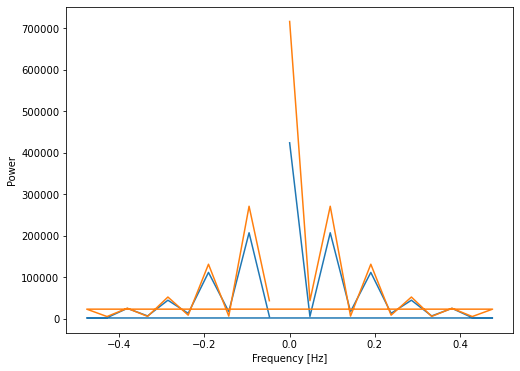

In [11]:
from scipy import fftpack
import numpy as np
from matplotlib import pyplot as plt

#loading data from file
data = np.loadtxt('data/populations.txt')
year, hares, lynxes, carrots = data.T

# plt.axes([0.2, 0.1, 0.5, 0.8]) 
# plt.plot(year, hares, year, lynxes, year, carrots) 
# plt.legend(('Hare', 'Lynx', 'Carrot'), loc=(1.05, 0.5))

lpop_fft = fftpack.fft(lynxes)
hpop_fft = fftpack.fft(hares)

t_step = 1 #year
lsample_freq = fftpack.fftfreq(lynxes.size, d=t_step)
lpower = np.abs(lpop_fft)
hsample_freq = fftpack.fftfreq(hares.size, d=t_step)
hpower = np.abs(hpop_fft)

plt.figure(figsize=(8, 6))
plt.plot(lsample_freq, lpower,hsample_freq, hpower)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')

pos_mask = np.where(lsample_freq > 0)
freqs = lsample_freq[pos_mask]
powes = lpower[pos_mask]
# find the max of freqs array
peak_freq = freqs[powes.argmax()]
print("Population period: ", 1/peak_freq) #Hares have the same peak frequency

# hpos_mask = np.where(hsample_freq > 0)
# hfreqs = hsample_freq[hpos_mask]
# hpowes = hpower[hpos_mask]
# # find the max of freqs array
# hpeak_freq = hfreqs[hpowes.argmax()]
# print("Hares population period: ", 1/hpeak_freq)

4\. **FFT of an image**

Write a filter that removes the periodic noise from the `moonlanding.png` image by using a 2-dimensional FFT.

* Import the image as a 2D numpy array using `plt.imread("moonlanding.png")`. Examine the image with `plt.imshow()`, which is heavily contaminated with periodic noise.
* Check the documentation of the `scipy.fftpack` package, and find the method that performs a 2D FFT. Plot the spectrum (Fourier transform of) the image. **Hint**: use `LogNorm` to plot the colors in log scale:
```Python
from matplotlib.colors import LogNorm
plt.imshow(image, norm=LogNorm(vmin=5))
```
* Inspect the spectrum, and try to locate the regions of the power spectrum that contain the signal and those which contain the periodic noise. Use array slicing to set the noise regions to zero.
* Apply the inverse Fourier transform to plot the resulting image.

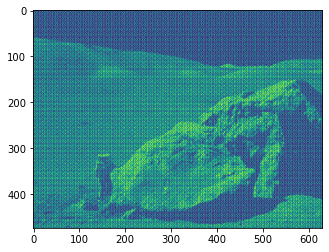

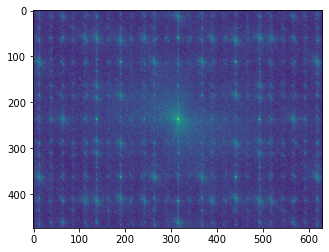

dimensions:  474 630


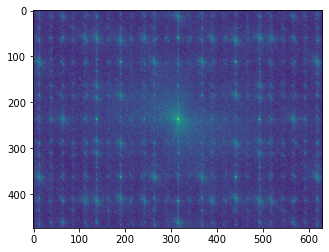

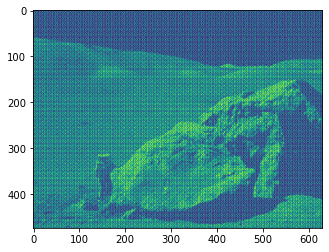

In [68]:
from math import sqrt, pi, erf
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from matplotlib.colors import LogNorm

###importing and showing the original image
moon = plt.imread("moonlanding.png")
plt.imshow(moon)
plt.show()

###applying the FFT to the image and plotting the spectrum
fourier = fftshift(fft2(moon))
plt.imshow(abs(fourier), norm=LogNorm(vmin=5))
plt.show()

#try mantaining the green regions and deleting the blue ones (maybe doable with slicing?)

f = fourier.copy() #applying denoising to copy
#noise_period = 25 #noise periodicity
x = int(f.shape[0])
y = int(f.shape[1])

#print("dimensions: ",x,y)
#centre = [int(x/2),int(y/2)]
#print("noise coordinates: ",noise)

for i in range(0):
    
    noise = np.where(f == np.amax(f)) #removing rows and columns for highest frequencies
    #print(noise)
    f[noise[0],:] = 0
    f[:,noise[1]] = 0
    
    
# f[centre[0],:] = 0
# f[centre[0],:] = 0
# f[:,centre[1]] = 0
# f[:,centre[1]] = 0

# noise = np.where(f == np.amax(f))
# print(noise)

plt.imshow(abs(f),  norm=LogNorm(vmin=5))
plt.show()
###plotting the inverse transformation of denoised image

four = ifft2(ifftshift(f))
plt.imshow(abs(four))
plt.show()